In [304]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.finance import candlestick_ohlc
from IPython.display import display


<h2>Get the Data</h2>

In [3]:
X = pd.read_csv("//bvt-fs-01//Users$//jwwilson//Documents//Historical//DAT_MT_EURUSD_M1_201801.csv",header=None)
X.columns = ["Date","Time","Open","High","Low","Close","unused"]

<h2>Indicators</h2>

In [468]:
#creates a numpy Array to add to a dataframe with OHLC data
#Moving Average"
def movingAverage(data,malength):
    close = data[["Close"]].values
    ma = []
    for j in range(0,len(close)):
        if j<malength: ma.append(0)
        else:ma.append(sum( close[(j-malength):(j)] )/(malength))
    return(np.array(ma).reshape(-1,1))

#Ma Slope
#input a moving average and get the slopes
def MAslope(madata,delta=1): 
    maslope = []
    for j in range(0,len(madata)): 
        if j<delta:
            maslope.append(0)
        else:
            maslope.append((madata[j]-madata[j-delta])/delta)
    return(np.array(maslope).reshape(-1,1))

#MADelta
def OMA(data,malength=5,lookback=1000):
    close = data[["Close"]].values
    ma = movingAverage(data,malength).reshape(-1,1) #this reshape speeds up thing by factor of a billion trillion
    oma = []
   # print("step 1")
    delta = ma-close
    print("step 1")
    for j in range(0,len(data)):
    #    if(np.mod(j,1000)==0): print(j)
        if(j<lookback): oma.append(0)
        else:
            segment = delta[j-lookback:j]
            oma.append(np.std(segment))
    return(np.array(oma).reshape(-1,1))        
    
#Get Highs and Lows

#RSI

#collapse timeframes

#Build Indicator Table
def buildIndicatorTable(X):
    sma14 = movingAverage(X,14)[:,0]
    sma60 = movingAverage(X,60)[:,0]
    sma200 = movingAverage(X,200)[:,0]
    mas14 = MAslope(sma14)[:,0]
    mas60 = MAslope(sma60)[:,0]
    mas200 = MAslope(sma200)[:,0]
    oma = OMA(X)[:,0]
    return(pd.DataFrame({'sma14':sma14,'sma60':sma60,'sma200':sma200,'mas14':mas14,'mas60':mas60,'mas200':mas200,'oma':oma}))

<h2>Entry Exit Logic</h2>

In [518]:
def getEntriesandExits(data,buythreshold=.2,sellthreshold=.2):
    entries = np.zeros(len(data))
    exits = np.zeros(len(data))
    tradeinprogress = False   
    for j in range(0,len(data)):       
        if(tradeinprogress==False):
            if(np.random.rand(1)<buythreshold):
                entries[j]=1
                tradeinprogress = True               
        else:
            if(np.random.rand(1)<sellthreshold or j == len(data)-1): #close if end reached
                exits[j]=1
                tradeinprogress = False                  
    return(entries,exits)

def getTradeTable(data,entries,exits): 
    PandL = []
    entryj = []
    exitj = []
    close = data[["Close"]].values
    tradeinprogress = False
    entryval = 0
    for j in range(0,len(data)):
        if(tradeinprogress==False):
            if(entries[j]==1):
                tradeinprogress = True               
                entryval = close[j]
                entryj.append(j)
        else:
             if(exits[j]==1):
                tradeinprogress = False
                exitval = close[j]
                PandL.append(exitval-entryval)
                exitj.append(j)
                
    returnFrame = pd.DataFrame({'entryindex':entryj,'exitindex':exitj,'PandL':np.array(PandL)[:,0]})
    return(returnFrame)

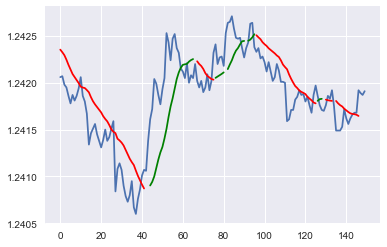

In [479]:
#masked Plotting
xx = range(0,150)
sp = np.ma.masked_where(maslope30 <= 0, ma30)
sn = np.ma.masked_where(maslope30 >= 0, ma30)
plt.plot(xx,X["Close"][-250:-100],xx,sp[-250:-100],'g',xx,sn[-250:-100],'r')

<h2>Candlestick Charting:</h2>

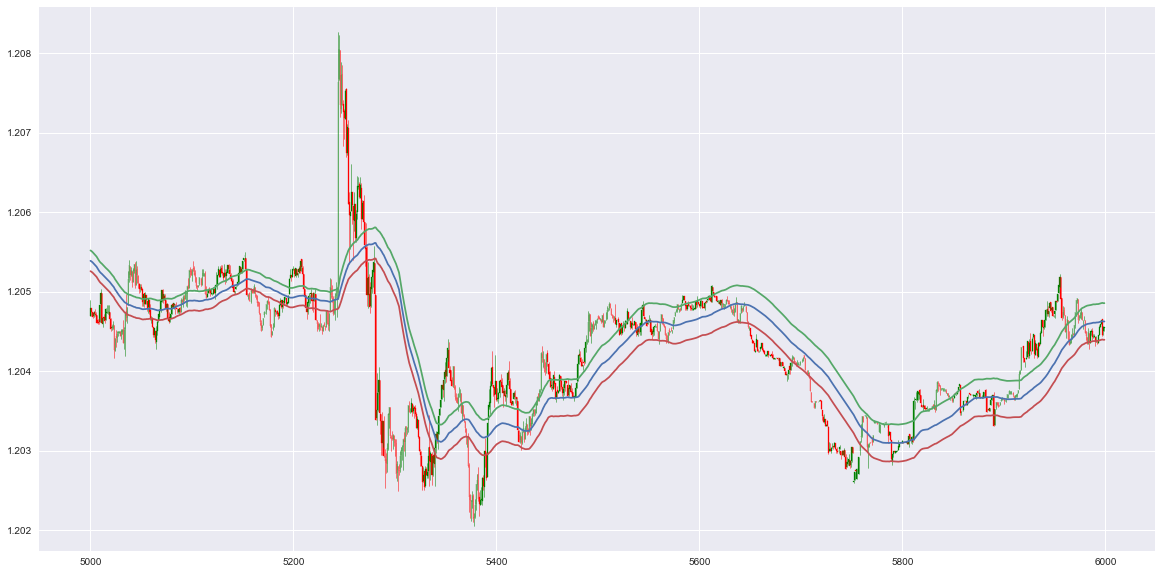

In [297]:
#candlestick
#testdata = np.arange(5000,6000).reshape(-1,1)
#data1 = X[["Open","High","Low","Close"]].values
#testdata = np.append(testdata,data1[5000:6000,:],1)

f1, ax = plt.subplots(figsize = (20,10))

# plot the candlesticks
_ = candlestick_ohlc(ax, testdata, width=.6, colorup='green', colordown='red')
ax.plot(range(5000,6000),ma60[5000:6000])
ax.plot(range(5000,6000),ma60[5000:6000]+oma[5000:6000],range(5000,6000),ma60[5000:6000]-oma[5000:6000])

<h2>Interactive</h2>

In [320]:
sma60 = movingAverage(X,60)
def f(x,y,z,data):
    return (x*sum(data))
interact(f, x=10,y=1,z=11,data = fixed(sma60));

C:\Users\jwwilson\AppData\Local\Continuum\Anaconda2\envs\ztdl\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=1, description='y…

In [309]:
intslider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    j = intslider.value 
    print("jindex = {}".format(j))
   

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

jindex = 7
jindex = 5
jindex = 7


In [310]:
intslider

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [335]:
len(X)

32066

In [492]:
(e,x) = getEntriesandExits(X,.1,.01)
print('entries = {} exits = {}'.format(sum(e),sum(x)))

entries = 273.0 exits = 273.0


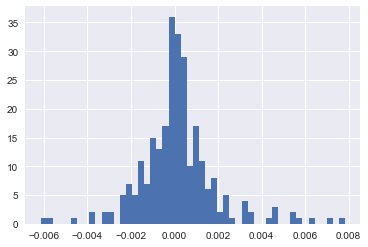

In [485]:
h = plt.hist(PnL,bins = 50)

In [433]:
1/.0001

10000.0

In [362]:
np.random.rand(1)>.1

array([ True], dtype=bool)

In [397]:
ent = close[3]

In [442]:
a1 = [1,2,3,4,5]
a2 = [3,4,5,6,7]
pd.DataFrame({"a1":a1,"a2":a2})


,a1,a2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


In [470]:
indicatorTable = buildIndicatorTable(X)

step 1


In [465]:
sma14 = movingAverage(X,14)
pd.DataFrame({"sma14":sma14[:,0]})

,sma14
0,0.0


In [536]:
trades = getTradeTable(X,e,x)
trades.describe()

,PandL,entryindex,exitindex
count,273.000000,273.000000,273.000000
mean,0.000145,15709.538462,15816.981685
std,0.001779,9022.948024,9026.696940
min,-0.008540,1.000000,440.000000
25%,-0.000520,7960.000000,8087.000000
50%,0.000110,15023.000000,15028.000000
75%,0.000780,23607.000000,23665.000000
max,0.008190,31978.000000,32065.000000


In [496]:
for j in range(0,len(a)):
    print('a = {}, j = {} lena = {}'.format(a[j],j,len(a)))

a = 0, j = 0 lena = 6
a = 1, j = 1 lena = 6
a = 2, j = 2 lena = 6
a = 3, j = 3 lena = 6
a = 4, j = 4 lena = 6
a = 5, j = 5 lena = 6


In [524]:
trades

,PandL,entryindex,exitindex
0,0.00146,1,440
1,0.00078,451,495
2,0.00402,498,798
3,-0.00315,799,1020
4,0.00181,1040,1092
5,-0.00042,1093,1229
6,0.00088,1235,1434
7,-0.00011,1435,1496
8,-0.00156,1505,1713
9,-0.00017,1716,1750
